In [1]:
import sys

sys.path.append('..')
import numpy as np
import json
from systems import CARModel
from matplotlib import pyplot as plt

In [2]:
car_abc = CARModel()

INFO:viaABC:Initializing viaABC class
The class can be initialized without a model, but it will not
be able to run the algorithm.
INFO:viaABC:viaABC class initialized with the following parameters:
INFO:viaABC:num_parameters: 6
INFO:viaABC:Mu: [0 0 0 0 0 0]
INFO:viaABC:Sigma: [1 1 1 1 1 1]
INFO:viaABC:t0: 4
INFO:viaABC:tmax: 30
INFO:viaABC:time_space: [ 4  7  9 14 17 22 26 30]
INFO:viaABC:pooling_method: no_cls
INFO:viaABC:metric: pairwise_cosine


In [3]:
# car_abc.generate_training_data([50000, 10000, 0], save_dir="/home/jp4474/latent-abc-smc/data/BCELL", seed=1004)

Training data shape: (200000, 8, 2)
Scaled observational data shape: (200000, 8, 2)
Collapsed data - Species 1 shape: (1600000,)
Collapsed data - Species 2 shape: (1600000,)


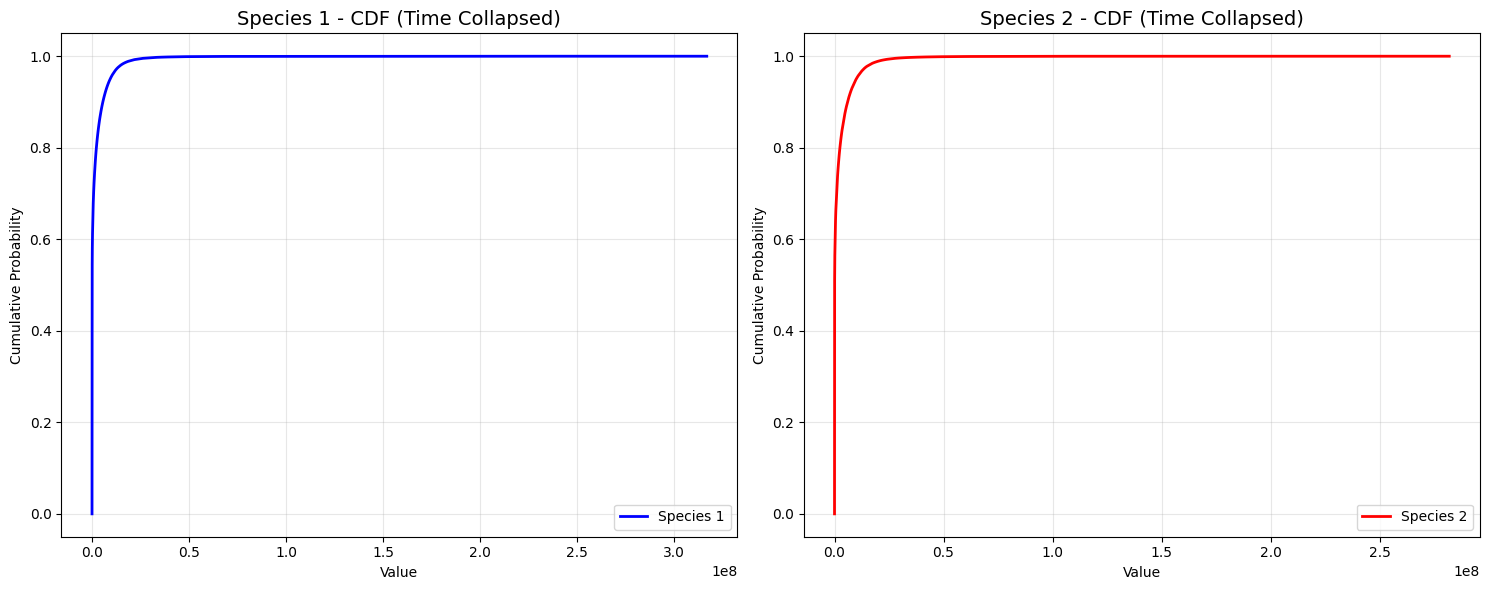


Basic statistics for the time-collapsed training data:
Species 1 - Min: 0.0000, Max: 316894100.1963
Species 1 - Mean: 1772759.9723, Std: 4689008.5770
Species 2 - Min: 0.0000, Max: 281960875.1508
Species 2 - Mean: 1893250.9473, Std: 4829403.0901

Percentiles for Species 1: {25: np.float64(1664.4561741331818), 50: np.float64(98715.7710107605), 75: np.float64(1393524.7742996705), 90: np.float64(5581674.227508149), 95: np.float64(9340567.492818255), 99: np.float64(19533461.38074869)}
Percentiles for Species 2: {25: np.float64(1927.6076256782057), 50: np.float64(49020.80113638175), 75: np.float64(1566732.249931361), 90: np.float64(5978148.292363613), 95: np.float64(9939503.259119635), 99: np.float64(20730815.007421672)}


In [3]:
# Plot the CDF of the training data by each dimension, collapsing the time dimension
# The data is shape of 50000 x 8 x 2 where 8 is the number of time points and 2 is the number of species

# Load the training data
train_data = np.load("/home/jp4474/viaABC/data/BCELL/train_data.npz", allow_pickle=True)['simulations']
print(f"Training data shape: {train_data.shape}")
scales = np.mean(np.abs(train_data), axis=(1))

scaled_observational_data = train_data / scales[:, np.newaxis, :]  # Scale the data
print(f"Scaled observational data shape: {scaled_observational_data.shape}")

# Collapse the time dimension by flattening across time points
# This creates a single distribution for each species across all time points
species1_collapsed = train_data[:, :, 0].flatten()  # Shape: (50000 * 8,)
species2_collapsed = train_data[:, :, 1].flatten()  # Shape: (50000 * 8,)

print(f"Collapsed data - Species 1 shape: {species1_collapsed.shape}")
print(f"Collapsed data - Species 2 shape: {species2_collapsed.shape}")

# Create the collapsed CDF plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Species 1 CDF (collapsed across time)
sorted_data1 = np.sort(species1_collapsed)
y1 = np.arange(1, len(sorted_data1) + 1) / len(sorted_data1)
ax1.plot(sorted_data1, y1, color='blue', linewidth=2, label='Species 1')
ax1.set_title('Species 1 - CDF (Time Collapsed)', fontsize=14)
ax1.set_xlabel('Value')
ax1.set_ylabel('Cumulative Probability')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Species 2 CDF (collapsed across time)
sorted_data2 = np.sort(species2_collapsed)
y2 = np.arange(1, len(sorted_data2) + 1) / len(sorted_data2)
ax2.plot(sorted_data2, y2, color='red', linewidth=2, label='Species 2')
ax2.set_title('Species 2 - CDF (Time Collapsed)', fontsize=14)
ax2.set_xlabel('Value')
ax2.set_ylabel('Cumulative Probability')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

# Print statistics for the collapsed data
print("\nBasic statistics for the time-collapsed training data:")
print(f"Species 1 - Min: {species1_collapsed.min():.4f}, Max: {species1_collapsed.max():.4f}")
print(f"Species 1 - Mean: {species1_collapsed.mean():.4f}, Std: {species1_collapsed.std():.4f}")
print(f"Species 2 - Min: {species2_collapsed.min():.4f}, Max: {species2_collapsed.max():.4f}")
print(f"Species 2 - Mean: {species2_collapsed.mean():.4f}, Std: {species2_collapsed.std():.4f}")

# Show percentiles
percentiles = [25, 50, 75, 90, 95, 99]
print(f"\nPercentiles for Species 1: {dict(zip(percentiles, np.percentile(species1_collapsed, percentiles)))}")
print(f"Percentiles for Species 2: {dict(zip(percentiles, np.percentile(species2_collapsed, percentiles)))}")

In [8]:
# import robust scaler
from sklearn.preprocessing import RobustScaler

In [12]:
train_data.shape

(200000, 8, 2)

In [18]:
scaler = RobustScaler()

In [19]:
scaled_train_data = scaler.fit_transform(train_data.reshape(-1, 16))

In [21]:
scaled_train_data = scaled_train_data.reshape(-1, 8, 2)

Collapsed data - Species 1 shape: (1600000,)
Collapsed data - Species 2 shape: (1600000,)


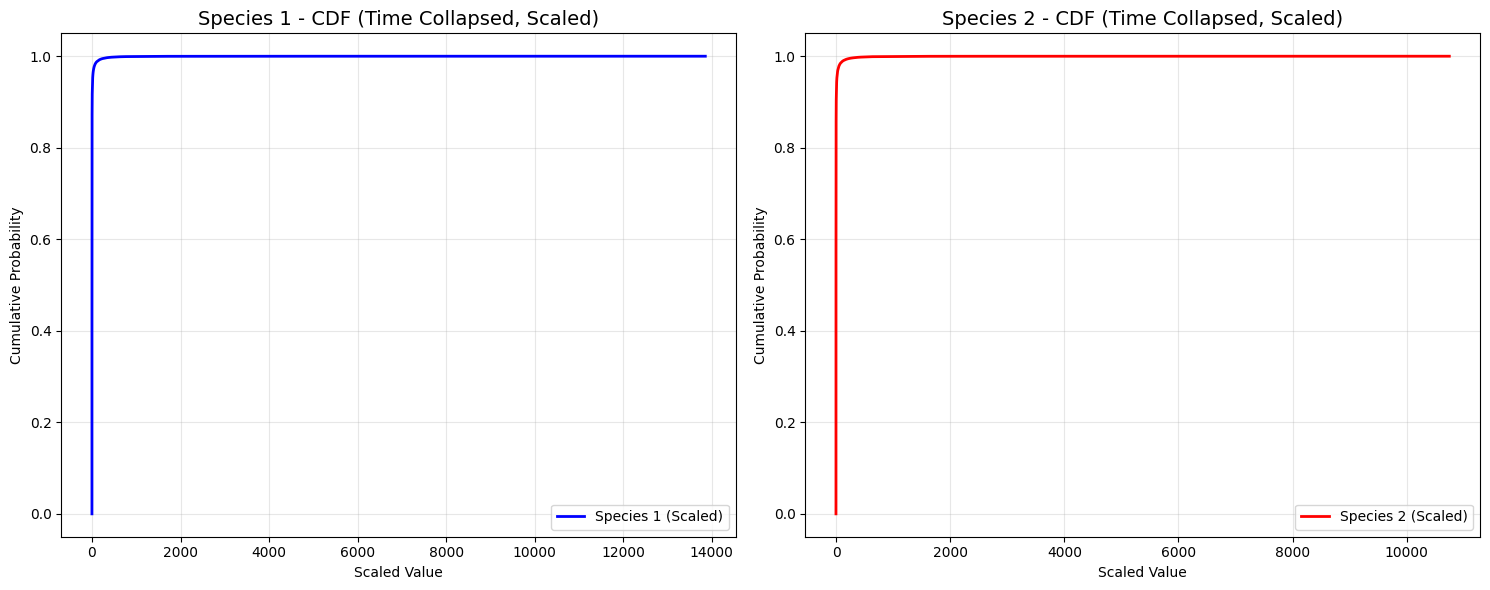


Basic statistics for the time-collapsed scaled training data:
Species 1 - Min: -0.6433, Max: 13852.3210
Species 1 - Mean: 6.3166, Std: 69.3595
Species 2 - Min: -0.6707, Max: 10745.1358
Species 2 - Mean: 5.8765, Std: 58.5165

Percentiles for Species 1: {25: np.float64(-0.016735883375597282), 50: np.float64(0.0), 75: np.float64(0.5495566657687228), 90: np.float64(4.025820435364111), 95: np.float64(14.571297506469337), 99: np.float64(131.1231439237355)}
Percentiles for Species 2: {25: np.float64(-0.01675040346358887), 50: np.float64(0.0), 75: np.float64(0.5508582156578028), 90: np.float64(3.9386338191988584), 95: np.float64(14.081782010541371), 99: np.float64(124.93674301879464)}


In [22]:
# Collapse the time dimension by flattening across time points
# This creates a single distribution for each species across all time points
species1_collapsed = scaled_train_data[:, :, 0].flatten()  # Shape: (50000 * 8,)
species2_collapsed = scaled_train_data[:, :, 1].flatten()  # Shape: (50000 * 8,)

print(f"Collapsed data - Species 1 shape: {species1_collapsed.shape}")
print(f"Collapsed data - Species 2 shape: {species2_collapsed.shape}")

# Create the collapsed CDF plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Species 1 CDF (collapsed across time)
sorted_data1 = np.sort(species1_collapsed)
y1 = np.arange(1, len(sorted_data1) + 1) / len(sorted_data1)
ax1.plot(sorted_data1, y1, color='blue', linewidth=2, label='Species 1 (Scaled)')
ax1.set_title('Species 1 - CDF (Time Collapsed, Scaled)', fontsize=14)
ax1.set_xlabel('Scaled Value')
ax1.set_ylabel('Cumulative Probability')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Species 2 CDF (collapsed across time)
sorted_data2 = np.sort(species2_collapsed)
y2 = np.arange(1, len(sorted_data2) + 1) / len(sorted_data2)
ax2.plot(sorted_data2, y2, color='red', linewidth=2, label='Species 2 (Scaled)')
ax2.set_title('Species 2 - CDF (Time Collapsed, Scaled)', fontsize=14)
ax2.set_xlabel('Scaled Value')
ax2.set_ylabel('Cumulative Probability')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

# Print statistics for the collapsed data
print("\nBasic statistics for the time-collapsed scaled training data:")
print(f"Species 1 - Min: {species1_collapsed.min():.4f}, Max: {species1_collapsed.max():.4f}")
print(f"Species 1 - Mean: {species1_collapsed.mean():.4f}, Std: {species1_collapsed.std():.4f}")
print(f"Species 2 - Min: {species2_collapsed.min():.4f}, Max: {species2_collapsed.max():.4f}")
print(f"Species 2 - Mean: {species2_collapsed.mean():.4f}, Std: {species2_collapsed.std():.4f}")

# Show percentiles
percentiles = [25, 50, 75, 90, 95, 99]
print(f"\nPercentiles for Species 1: {dict(zip(percentiles, np.percentile(species1_collapsed, percentiles)))}")
print(f"Percentiles for Species 2: {dict(zip(percentiles, np.percentile(species2_collapsed, percentiles)))}")

In [30]:
obs_data = np.load("/home/jp4474/viaABC/data/BCELL/noisy_data.npy")
scaled_obs_data = scaler.transform(obs_data.reshape(-1, 16))

In [31]:
scaled_obs_data.shape

(1, 16)

In [32]:
scaler.scale_

array([1.00000000e+00, 1.00000000e+00, 5.43792856e+06, 5.64158603e+06,
       3.97112574e+06, 4.23302836e+06, 1.22443577e+06, 1.36036575e+06,
       5.83290182e+05, 6.55096590e+05, 1.66703980e+05, 1.91094681e+05,
       6.20179480e+04, 7.07608714e+04, 2.28766028e+04, 2.62407865e+04])

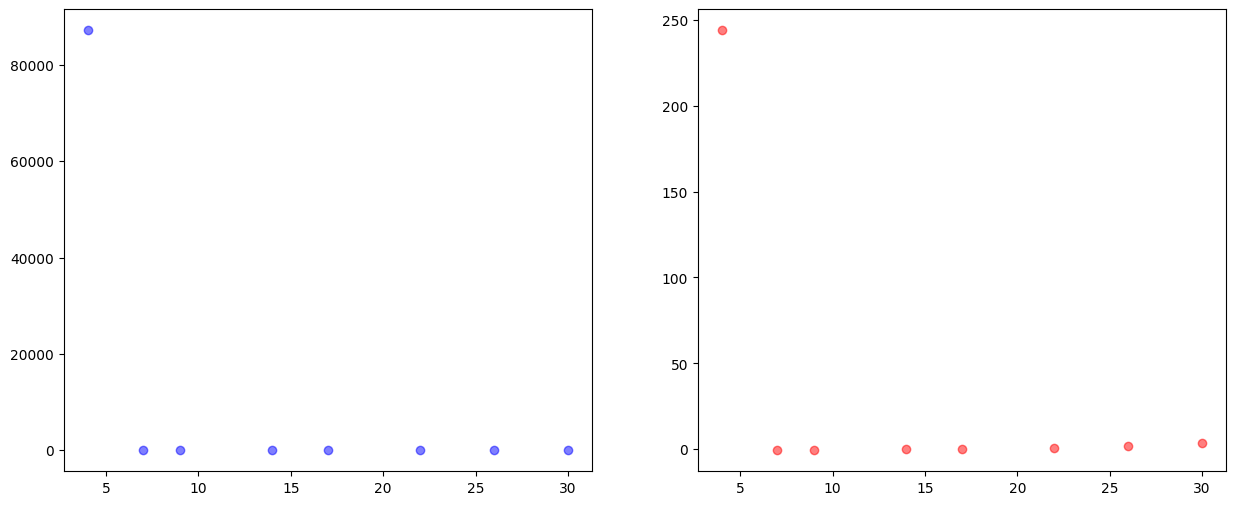

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].scatter(car_abc.time_space, scaled_obs_data.reshape(-1, 2)[:,0], color='blue', alpha=0.5, label='Species 1 (Scaled)')
ax[1].scatter(car_abc.time_space, scaled_obs_data.reshape(-1, 2)[:,1], color='red', alpha=0.5, label='Species 2 (Scaled)')

In [10]:
scales.shape

(200000, 2)

In [12]:
scales[:,0].min(), scales[:,0].max(), scales[:,1].min(), scales[:,1].max()

(np.float64(13065.483767125033),
 np.float64(153290010.09802988),
 np.float64(7836.454965905831),
 np.float64(145867338.2081784))

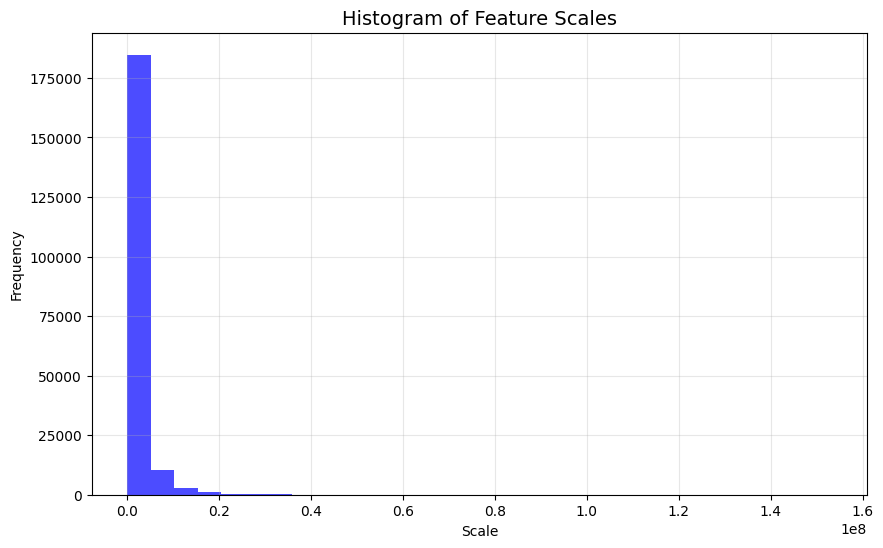

In [11]:
# visualize the scales using histrogram
# scales = np.mean(np.abs(train_data), axis=(1))

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(scales[:,0], bins=30, color='blue', alpha=0.7)
ax.set_title('Histogram of Feature Scales', fontsize=14)
ax.set_xlabel('Scale')
ax.set_ylabel('Frequency')
ax.grid(True, alpha=0.3)
plt.show()


In [13]:
import numpy as np
import pandas as pd

def discretize_to_tokens(values, num_bins=50):
    """
    Discretize heavy-tailed values into token IDs using logarithmic binning.

    Parameters:
    - values (array-like): Input numeric data
    - num_bins (int): Number of bins for discretization

    Returns:
    - token_ids (np.ndarray): Array of token IDs for each value
    - bin_edges (np.ndarray): The bin edges used
    - token_to_range (dict): Mapping of token ID -> (bin_min, bin_max)
    """
    values = np.array(values)
    if np.any(values <= 0):
        raise ValueError("All values must be positive for log binning.")

    # Create logarithmic bins
    log_min, log_max = np.log10(values.min()), np.log10(values.max())
    bin_edges = np.logspace(log_min, log_max, num_bins + 1)

    # Assign token IDs
    token_ids = np.digitize(values, bin_edges) - 1  # bins start from 0

    # Map token ID to its scale range
    token_to_range = {
        i: (bin_edges[i], bin_edges[i+1])
        for i in range(len(bin_edges) - 1)
    }

    return token_ids, bin_edges, token_to_range

In [15]:
token_ids, bin_edges, token_to_range = discretize_to_tokens(scales[:,0])